In [44]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [45]:
def read_corpus(path):
    
    df_corpus = pd.read_csv(path)

    corpus_dict = {}

    for i in range(len(df_corpus)):

        word = str(df_corpus.word[i])
        count = int(df_corpus.num[i])
        corpus_dict[word] = count

    return corpus_dict

In [46]:
def filter_words(report0):
    
    report = []
    
    for i in range(len(report0)):
        
        if(report0[i] not in report):
            if(len(report0[i])>=2 and len(report0[i])<=8):
                report.append(report0[i])
    
    return report

In [47]:
def update_corpus(report,corpus_dict):
    
    corpus_list = list(corpus_dict.keys())
    
    for i in range(len(report)):
        
        report_word = report[i]
        if(report_word in corpus_list):
            corpus_dict[report_word] = corpus_dict[report_word]+1
        else:
            corpus_dict[report_word] = 1
    
    return corpus_dict

In [48]:
def save_corpus(corpus_dict):
    
    corpus_save = []
    
    corpus_list = list(corpus_dict.keys())
    
    for i in range(len(corpus_list)):
        
        one_word = {}
        one_word['word'] = corpus_list[i]
        one_word['num'] = corpus_dict[corpus_list[i]]
        corpus_save.append(one_word)
    
    corpus_save = pd.DataFrame(corpus_save)
    
    return corpus_save

In [49]:
def build_corpus(filename,t1,t2):
    
    df_hs300 = pd.read_csv('data/HS300/' + filename + '.csv')
    stock_code = list(df_hs300['成份代码'])
    foldername = t1+'-'+t2

    for i in range(len(stock_code)):
        
        corpus_dict = read_corpus('data/HS300/' + foldername + '/corpus.csv')
        
        one_stock_code = stock_code[i]
        savefilepath = 'data/HS300/' + foldername + '/'+ one_stock_code+'.csv'
        df = pd.read_csv(savefilepath)
        df = df.dropna()
        df = df.reset_index(drop=True)
        
        for j in range(len(df)):
    
            report0 = list(df.words[j].split("/"))
            report = filter_words(report0)
            corpus_dict = update_corpus(report,corpus_dict)
        
        corpus_df = save_corpus(corpus_dict)
        print(i)
        print(len(corpus_df))
        
        corpus_df.to_csv('data/HS300/' + foldername + '/corpus.csv', index=False, encoding='utf_8_sig')

In [50]:
build_corpus('2015-12-30','20151230','20160613')

0
10853
1
16305
2
20048
3
22001
4
26389
5
30426
6
32036
7
33147
8
35303
9
37663
10
40472
11
41846
12
42928
13
45336
14
49581
15
50653
16
51276
17
52180
18
53524
19
54457
20
55236
21
57216
22
57588
23
59610
24
60414
25
61478
26
61961
27
62631
28
63053
29
64357
30
64987
31
66000
32
67315
33
68224
34
69212
35
70864
36
71444
37
71888
38
73243
39
74160
40
74952
41
75346
42
76445
43
77271
44
78350
45
79208
46
80056
47
80853
48
82463
49
82969
50
83740
51
86170
52
86557
53
87633
54
91048
55
91994
56
92423
57
93207
58
95682
59
96804
60
97388
61
97945
62
98607
63
99793
64
100233
65
100729
66
102068
67
102628
68
103549
69
103965
70
104793
71
105471
72
106557
73
106982
74
107684
75
108257
76
109566
77
109889
78
110874
79
111423
80
114090
81
114511
82
114871
83
115301
84
115827
85
116624
86
116943
87
117343
88
117626
89
118675
90
119245
91
119972
92
120450
93
121134
94
121562
95
122330
96
123548
97
125837
98
126482
99
128200
100
128756
101
130125
102
132463
103
132986
104
133530
105
134413
106
1372

In [7]:
build_corpus('2015-12-30','20151230','20160613')

10853
16305
20048
22001
26389
30426
32036
33147
35303
37663
40472
41846
42928
45336
49581
50653
51276
52180
53524
54457
55236
57216
57588
59610
60414
61478
61961
62631
63053
64357
64987
66000
67315
68224
69212
70864
71444
71888
73243
74160
74952
75346
76445
77271
78350
79208
80056
80853
82463
82969
83740
86170
86557
87633
91048
91994
92423
93207
95682
96804
97388
97945
98607
99793
100233
100729
102068
102628
103549
103965
104793
105471
106557
106982
107684
108257
109566
109889
110874
111423
114090
114511
114871
115301
115827
116624
116943
117343
117626
118675
119245
119972
120450
121134
121562
122330
123548
125837
126482
128200
128756
130125
132463
132986
133530
134413
137218
138031
139118
139118
139963
140900
141378
141997
142627
143623
144563
144563
145089
145349
146024
146435
147691
148959
149568
150262
150991
151369
151651
152273
153300
153824
154853
155767
155914
157006
157296
157460
157728
159089
159463
160106
160681
161305
161848
162279
162973
163242
163877
164523
165369
165817


In [9]:
df_corpus = pd.read_csv("data/HS300/20151230-20160613/corpus.csv")
df_corpus[0:100]

,word,num
0,核心技术,579
1,推广,1081
2,增值,1174
3,领先,1243
4,贴现,701
...,...,...
95,弥补,1067
96,资产重组,2556
97,坏账,546
98,立案,401


In [10]:
len(df_corpus)

262525

In [11]:
from statistics import mean, median

num_list = list(df_corpus['num'])
len(num_list)

262525

In [12]:
max(num_list)

17175

In [13]:
min(num_list)

0

In [14]:
mean(num_list)

29.91701361775069

In [15]:
median(num_list)

2

In [17]:
for i in range(200):
    
    print(str(df_corpus.word[i]) + " " + str(df_corpus.num[i]))

核心技术 579
推广 1081
增值 1174
领先 1243
贴现 701
考核 2198
获授 471
绩效 827
新兴 848
折现 790
动力 1150
有效性 1679
健全 1476
适用 0
自有 1388
超募 554
广泛 0
合规 2286
资助 840
团队 1519
派息 829
优秀 904
着力 776
溢价 759
定制 444
通过 0
预先 809
高端 1004
创造 1366
创业 543
成就 398
改进 1163
引领 679
稳步 1029
引进 988
试行 1113
差异化 658
扶贫 175
派发 1244
驱动 749
一流 699
现金管理 539
首个 456
国际化 878
技术骨干 98
最佳 992
安全性 771
精准 368
关键 1275
幸福 251
股息 690
成果 2463
履约 700
改造 1290
还本付息 697
净亏损 900
无限 1654
除息 103
付息 1259
下跌 967
融券 1088
减值 1242
无偿 997
解散 417
摊薄 698
不可 0
享受 1381
不利 1767
筹划 805
未能 2267
下滑 838
债权 1471
遭受 972
不足 0
下降 2239
赔付 562
支付现金 1080
利息支出 1365
放弃 1449
偿还债务 1272
更名 893
平稳 838
卖出 675
拆出 160
侵占 362
只能 1146
兑付 1252
放缓 889
返还 1311
停牌 872
流出 1347
商誉 1207
违约 1235
亏损 2050
出售 2227
弥补 1067
资产重组 2556
坏账 546
立案 401
购回 1054
补偿 1522
证券 12889
代码 10918
公告 13438
编号 10847
优先股 2236
平银优 12
股份有限公司 13360
年度 9675
权益 3704
分派 962
实施 7214
公司 17175
董事会 15894
全体成员 5296
保证 14392
信息 9849
披露 11336
内容 14579
真实 9837
准确 9152
完整 9742
虚假 12443
记载 12482
误导性 12261
陈述 12746
遗漏 12533
方案 5317
已

In [18]:
# remove num = 1

df_corpus.drop(df_corpus.loc[df_corpus['num']==1].index, inplace=True)
df_corpus = df_corpus.reset_index(drop=True)
len(df_corpus)

151599

In [19]:
num_list = list(df_corpus['num'])
mean(num_list)

51.07578546032626

In [20]:
median(num_list)

4

In [21]:
# remove num = 2

df_corpus.drop(df_corpus.loc[df_corpus['num']==2].index, inplace=True)
df_corpus = df_corpus.reset_index(drop=True)
len(df_corpus)

107389

In [22]:
num_list = list(df_corpus['num'])
print(mean(num_list))
print(median(num_list))

71.27934890910615
7


In [23]:
# remove num = 3

df_corpus.drop(df_corpus.loc[df_corpus['num']==3].index, inplace=True)
df_corpus = df_corpus.reset_index(drop=True)
len(df_corpus)

85980

In [24]:
# remove num = 4

df_corpus.drop(df_corpus.loc[df_corpus['num']==4].index, inplace=True)
df_corpus = df_corpus.reset_index(drop=True)
len(df_corpus)

72313

In [25]:
num_list = list(df_corpus['num'])
print(mean(num_list))
print(median(num_list))

104.20979630218633
13


In [26]:
# remove num = 5

df_corpus.drop(df_corpus.loc[df_corpus['num']==5].index, inplace=True)
df_corpus = df_corpus.reset_index(drop=True)
len(df_corpus)

63498

In [27]:
num_list = list(df_corpus['num'])
print(mean(num_list))
print(median(num_list))

117.98242464329586
15.0


In [29]:
# remove num = 6

df_corpus.drop(df_corpus.loc[df_corpus['num']==6].index, inplace=True)
df_corpus = df_corpus.reset_index(drop=True)
len(df_corpus)

56456

In [30]:
# remove num = 7

df_corpus.drop(df_corpus.loc[df_corpus['num']==7].index, inplace=True)
df_corpus = df_corpus.reset_index(drop=True)
len(df_corpus)

51185

In [31]:
for i in range(300):
    
    print(str(df_corpus.word[i]) + " " + str(df_corpus.num[i]))

核心技术 579
推广 1081
增值 1174
领先 1243
贴现 701
考核 2198
获授 471
绩效 827
新兴 848
折现 790
动力 1150
有效性 1679
健全 1476
适用 0
自有 1388
超募 554
广泛 0
合规 2286
资助 840
团队 1519
派息 829
优秀 904
着力 776
溢价 759
定制 444
通过 0
预先 809
高端 1004
创造 1366
创业 543
成就 398
改进 1163
引领 679
稳步 1029
引进 988
试行 1113
差异化 658
扶贫 175
派发 1244
驱动 749
一流 699
现金管理 539
首个 456
国际化 878
技术骨干 98
最佳 992
安全性 771
精准 368
关键 1275
幸福 251
股息 690
成果 2463
履约 700
改造 1290
还本付息 697
净亏损 900
无限 1654
除息 103
付息 1259
下跌 967
融券 1088
减值 1242
无偿 997
解散 417
摊薄 698
不可 0
享受 1381
不利 1767
筹划 805
未能 2267
下滑 838
债权 1471
遭受 972
不足 0
下降 2239
赔付 562
支付现金 1080
利息支出 1365
放弃 1449
偿还债务 1272
更名 893
平稳 838
卖出 675
拆出 160
侵占 362
只能 1146
兑付 1252
放缓 889
返还 1311
停牌 872
流出 1347
商誉 1207
违约 1235
亏损 2050
出售 2227
弥补 1067
资产重组 2556
坏账 546
立案 401
购回 1054
补偿 1522
证券 12889
代码 10918
公告 13438
编号 10847
优先股 2236
平银优 12
股份有限公司 13360
年度 9675
权益 3704
分派 962
实施 7214
公司 17175
董事会 15894
全体成员 5296
保证 14392
信息 9849
披露 11336
内容 14579
真实 9837
准确 9152
完整 9742
虚假 12443
记载 12482
误导性 12261
陈述 12746
遗漏 12533
方案 5317
已

144.81779818306146
22


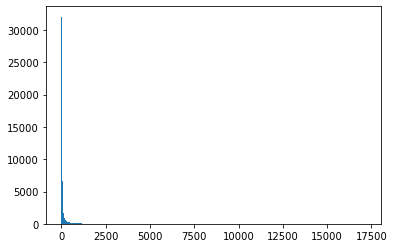

In [40]:
from matplotlib import pyplot as plt

num_list = list(df_corpus['num'])
print(mean(num_list))
print(median(num_list))

plt.hist(num_list,500)

plt.show()

In [41]:
# remove num ≤ 65

df_corpus.drop(df_corpus.loc[df_corpus['num']<=65].index, inplace=True)
df_corpus = df_corpus.reset_index(drop=True)
len(df_corpus)

12887

In [42]:
num_list = list(df_corpus['num'])
print(mean(num_list))
print(median(num_list))

513.8556685031427
189


In [43]:
for i in range(300):
    
    print(str(df_corpus.word[i]) + " " + str(df_corpus.num[i]))

核心技术 579
推广 1081
增值 1174
领先 1243
贴现 701
考核 2198
获授 471
绩效 827
新兴 848
折现 790
动力 1150
有效性 1679
健全 1476
自有 1388
超募 554
合规 2286
资助 840
团队 1519
派息 829
优秀 904
着力 776
溢价 759
定制 444
预先 809
高端 1004
创造 1366
创业 543
成就 398
改进 1163
引领 679
稳步 1029
引进 988
试行 1113
差异化 658
扶贫 175
派发 1244
驱动 749
一流 699
现金管理 539
首个 456
国际化 878
技术骨干 98
最佳 992
安全性 771
精准 368
关键 1275
幸福 251
股息 690
成果 2463
履约 700
改造 1290
还本付息 697
净亏损 900
无限 1654
除息 103
付息 1259
下跌 967
融券 1088
减值 1242
无偿 997
解散 417
摊薄 698
享受 1381
不利 1767
筹划 805
未能 2267
下滑 838
债权 1471
遭受 972
下降 2239
赔付 562
支付现金 1080
利息支出 1365
放弃 1449
偿还债务 1272
更名 893
平稳 838
卖出 675
拆出 160
侵占 362
只能 1146
兑付 1252
放缓 889
返还 1311
停牌 872
流出 1347
商誉 1207
违约 1235
亏损 2050
出售 2227
弥补 1067
资产重组 2556
坏账 546
立案 401
购回 1054
补偿 1522
证券 12889
代码 10918
公告 13438
编号 10847
优先股 2236
股份有限公司 13360
年度 9675
权益 3704
分派 962
实施 7214
公司 17175
董事会 15894
全体成员 5296
保证 14392
信息 9849
披露 11336
内容 14579
真实 9837
准确 9152
完整 9742
虚假 12443
记载 12482
误导性 12261
陈述 12746
遗漏 12533
方案 5317
已获 248
年度股东大会 3902
审议 11494
现将 18

In [ ]:
def count_report_num(filename,t1,t2):
    
    num = 0
    
    df_hs300 = pd.read_csv('data/HS300/' + filename + '.csv')
    stock_code = list(df_hs300['成份代码'])
    foldername = t1+'-'+t2

    for i in range(len(stock_code)):
        
       
        one_stock_code = stock_code[i]
        savefilepath = 'data/HS300/' + foldername + '/'+ one_stock_code+'.csv'
        df = pd.read_csv(savefilepath)
        df = df.dropna()
        df = df.reset_index(drop=True)